In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [ ]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['Crop_recommendation.csv']))
print(data.head())

   Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label  Unnamed: 8  Unnamed: 9  
0  202.935536  rice         NaN         NaN  
1  226.655537  rice         NaN         NaN  
2  263.964248  rice         NaN         NaN  
3  242.864034  rice         NaN         NaN  
4  262.717340  rice         NaN         NaN  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Basic Analysis

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB
None


In [ ]:
print(data.describe())

          Nitrogen   phosphorus    potassium  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  Unnamed: 8  Unnamed: 9  
count  2200.000000  2200.000000         0.0         0.0  
mean      6.469480   103.463655         NaN         NaN  
std       0.773938    54.958389         NaN         NaN  
min       3.504752    20.211267         NaN         NaN  
25%       5.971693    64.551686         NaN

cleaning Data

In [ ]:
data = data.drop(['Unnamed: 8', 'Unnamed: 9'], axis=1)

In [ ]:
print(data.isnull().sum())

Nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


Data Overview

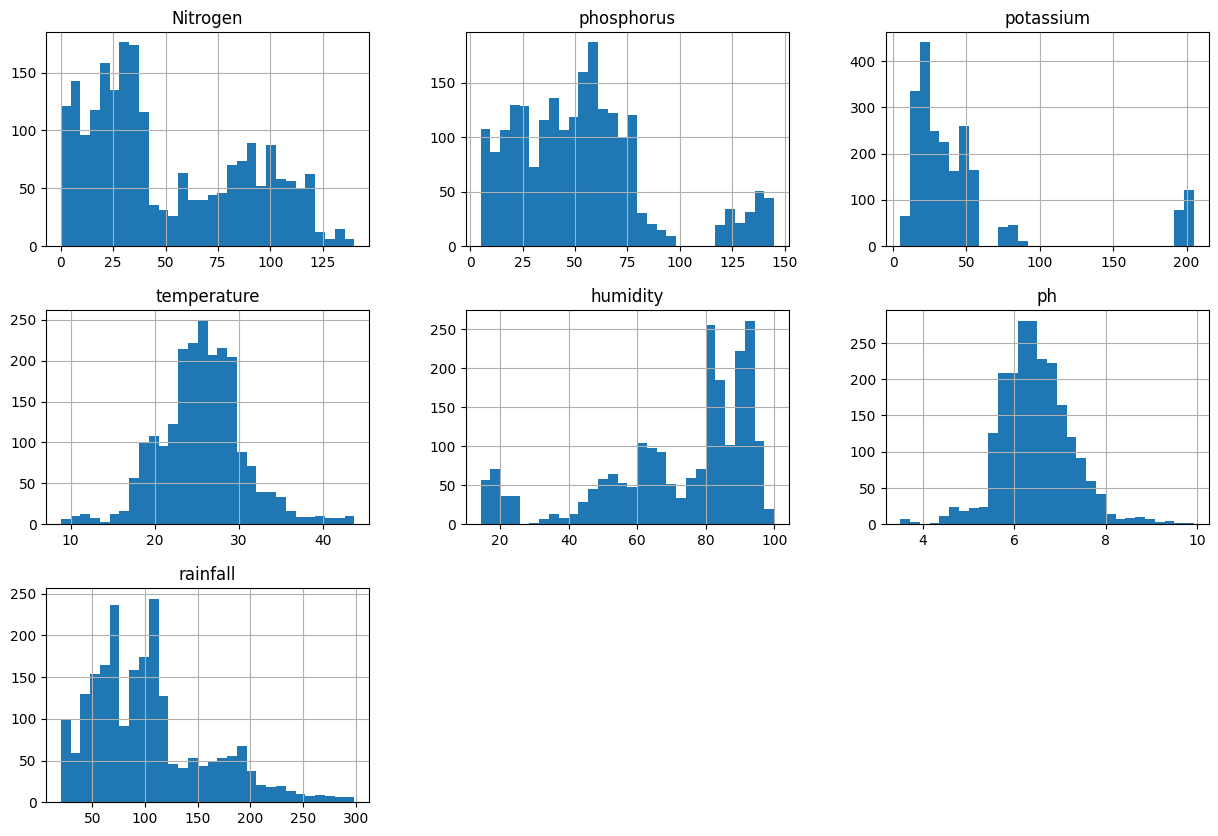

In [ ]:
data.hist(bins=30, figsize=(15,10))
plt.show()

Feature Engineering and Preprocessing

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['label'] = label_encoder.fit_transform(data['label'])

print(data.head())

   Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall  label  
0  202.935536     20  
1  226.655537     20  
2  263.964248     20  
3  242.864034     20  
4  262.717340     20  


Splitting Data

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

Data Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

l'll try the following models:

Logistic Regression

Random Forest Classifier

Gradient Boosting Classifier

Support Vector Machine (SVM)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.95      0.95      0.95        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00     

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00

Gradient Boosting Classifier:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

print("Gradient Boosting Classifier Performance:")
print(classification_report(y_test, y_pred_gbc))

Gradient Boosting Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.82      1.00      0.90        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      

Support Vector Machine (SVM):

In [ ]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("Support Vector Machine (SVM) Performance:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM) Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.78      0.91      0.84        23
           9       0.91      1.00      0.95        20
          10       0.79      1.00      0.88        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      

#Saving the best prediction Model (Random Forest model)

In [ ]:
import joblib

joblib.dump(rf, 'crop_recommendation_model.pkl')

['crop_recommendation_model.pkl']

In [ ]:
rf_model = joblib.load('crop_recommendation_model.pkl')